In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster

# Set style for seaborn
sns.set(style='whitegrid')


In [2]:
# Load your dataset
vehicle_data = pd.read_csv('/content/road_accident_data_by_vehicle_type.csv')

# Display the first few rows of the vehicle data
print("Vehicle Data:")
display(vehicle_data.head())



Vehicle Data:


,Location,Motor Car,Dual Purpose Vehicle,Lorry,Cycle,Motor Cycle/Moped,Three wheeler,"Articulated Vehicle, prime mover",SLT Bus,Private Bus,Intercity Bus,Land Vehicle/Tractor,Animal drawn vehicle or rider on animal,Other
0,Ampara,59,102,121,93,575,169,4,15,35,1,41,4,0
1,Anuradhapura,116,224,246,158,845,196,2,28,104,3,72,0,6
2,Badulla (Badulla & Bandarawela Divisions),82,121,171,20,266,219,2,58,78,1,16,0,5
3,Batticaloa,26,43,30,64,224,52,4,9,25,1,24,1,2
4,Chilaw (Chilaw & Puttalam Divisions),102,213,224,134,530,163,14,23,84,1,19,1,3


In [6]:
# Check the structure of the DataFrame
print("\nDataFrame Information:")
vehicle_data.info()



DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Location                                 25 non-null     object
 1   Motor Car                                25 non-null     int64 
 2   Dual Purpose Vehicle                     25 non-null     int64 
 3   Lorry                                    25 non-null     int64 
 4   Cycle                                    25 non-null     int64 
 5   Motor Cycle/Moped                        25 non-null     int64 
 6   Three wheeler                            25 non-null     int64 
 7   Articulated Vehicle, prime mover         25 non-null     int64 
 8   SLT Bus                                  25 non-null     int64 
 9   Private Bus                              25 non-null     int64 
 10  Intercity Bus                           

<ipython-input-23-bbe9de438b30>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='Blues_r')


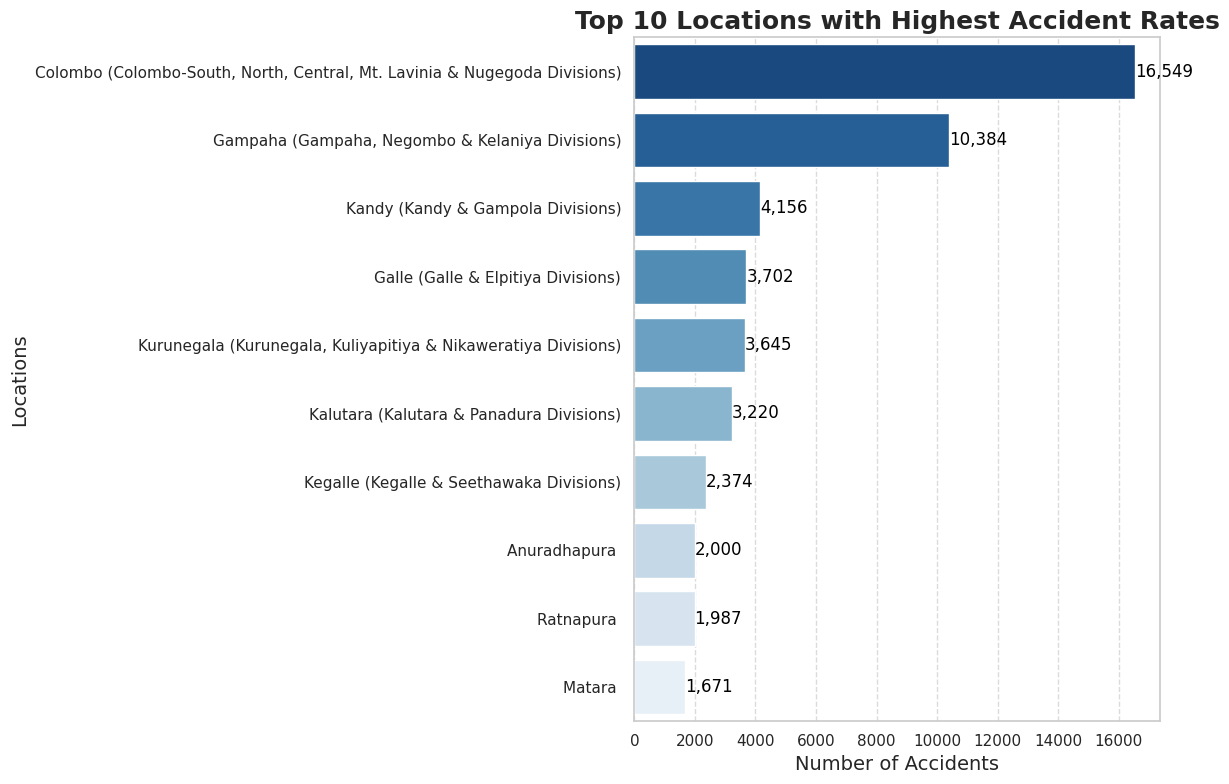

In [23]:

plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='Blues_r')

plt.title('Top 10 Locations with Highest Accident Rates', fontsize=18, fontweight='bold')
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Locations', fontsize=14)


for index, value in enumerate(top_locations.values):
    plt.text(value, index, f'{value:,}', color='black', ha='left', va='center', fontsize=12)


plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [24]:
locations = vehicle_data.groupby('Location').sum(numeric_only=True)

# Displaying total accidents
print("\nTotal Accidents by Location:")
print(locations)

# Extracting top locations with the highest accident rates
top_locations = locations.sum(axis=1).sort_values(ascending=False)[:10]


Total Accidents by Location:
                                                    Motor Car  \
Location                                                        
Ampara                                                     59   
Anuradhapura                                              116   
Badulla (Badulla & Bandarawela Divisions)                  82   
Batticaloa                                                 26   
Chilaw (Chilaw & Puttalam Divisions)                      102   
Colombo (Colombo-South, North, Central, Mt. Lav...       4708   
Galle (Galle & Elpitiya Divisions)                        488   
Gampaha (Gampaha, Negombo & Kelaniya Divisions)          2018   
Jaffna (Jaffna & KKS Divisions)                            32   
Kalutara (Kalutara & Panadura Divisions)                  381   
Kandy (Kandy & Gampola Divisions)                         735   
Kegalle (Kegalle & Seethawaka Divisions)                  281   
Kilinochchi (Kilinochchi & Mankulam Divisions)              

In [9]:

folium_map = folium.Map(location=[7.8731, 80.7718], zoom_start=8, tiles='CartoDB dark_matter')


if 'Lat' in vehicle_data.columns and 'Lon' in vehicle_data.columns:
    for _, row in vehicle_data.iterrows():
        folium.Marker(location=[row['Lat'], row['Lon']],
                      popup=row['Location'],
                      icon=folium.Icon(color='blue')).add_to(folium_map)
else:
    print("Latitude and Longitude columns not found in the dataset.")


folium_map.save('accident_map.html')


folium_map


Latitude and Longitude columns not found in the dataset.


In [11]:

print("Folium map saved as 'accident_map.html'. You can download it and view in a web browser.")


Folium map saved as 'accident_map.html'. You can download it and view in a web browser.


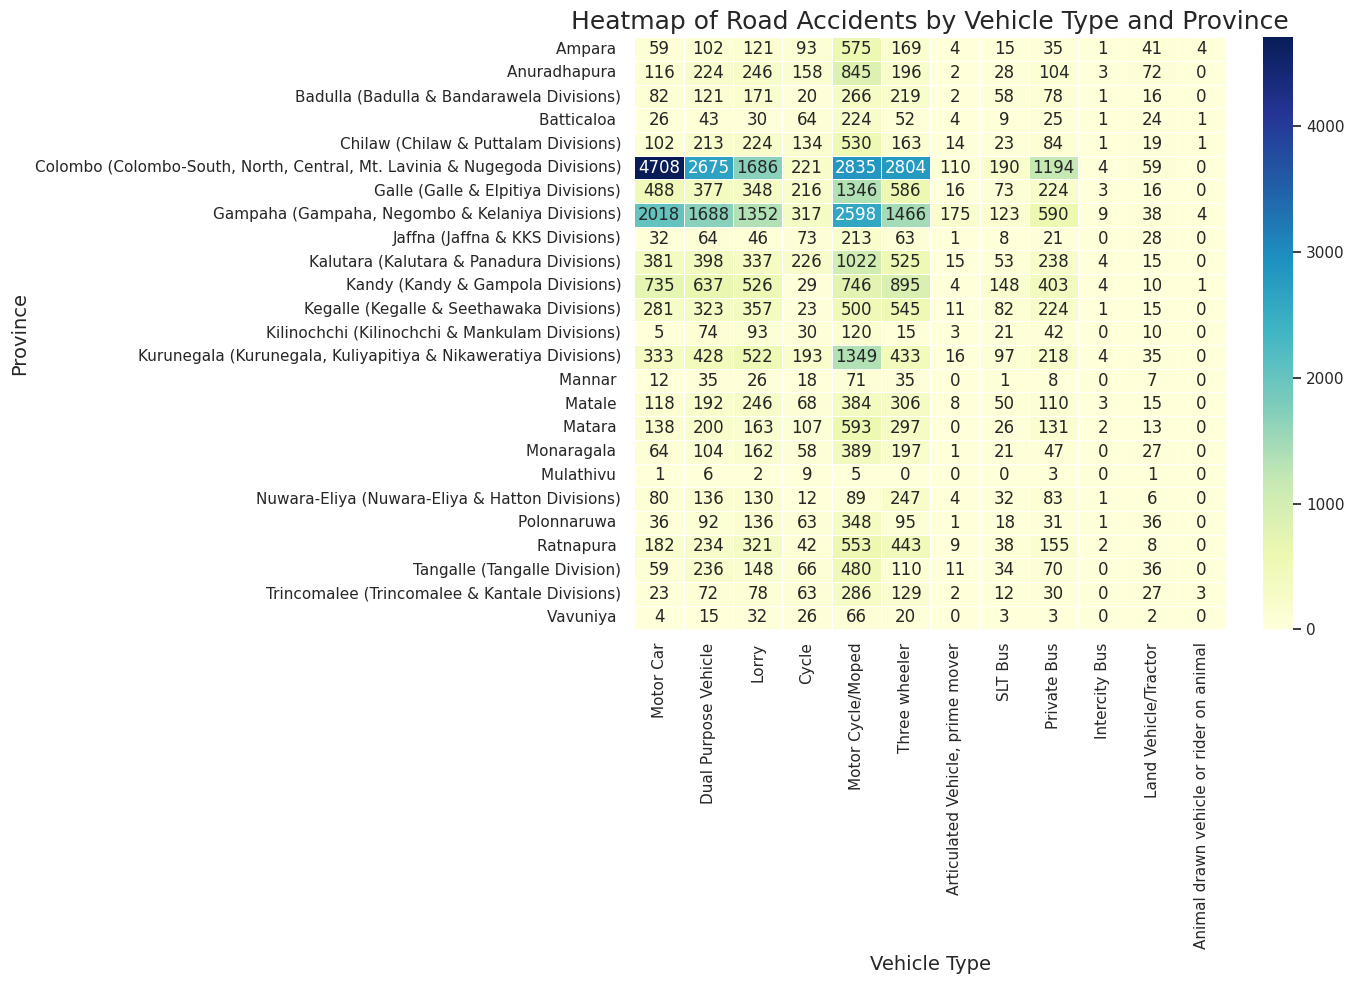

Accidents by vehicle type across all provinces (sorted):
Motor Cycle/Moped                          16433
Motor Car                                  10083
Three wheeler                              10010
Dual Purpose Vehicle                        8689
Lorry                                       7503
Private Bus                                 4151
Cycle                                       2329
SLT Bus                                     1163
Land Vehicle/Tractor                         576
Articulated Vehicle, prime mover             413
Intercity Bus                                 45
Animal drawn vehicle or rider on animal       14
dtype: int64

Provinces with significantly high motorcycle accidents:
                                                    Motor Cycle/Moped
Location                                                             
Colombo (Colombo-South, North, Central, Mt. Lav...               2835
Gampaha (Gampaha, Negombo & Kelaniya Divisions)                  2598


In [15]:
accident_data = pd.read_csv("/content/road_accident_data_by_vehicle_type.csv")

vehicle_types = accident_data.columns[1:-1]
province_accidents = accident_data[['Location'] + list(vehicle_types)]


plt.figure(figsize=(14, 10))
sns.heatmap(province_accidents.set_index('Location'), annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Road Accidents by Vehicle Type and Province', fontsize=18)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Province', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


province_totals = province_accidents.set_index('Location').sum(axis=0)
province_totals_sorted = province_totals.sort_values(ascending=False)


print("Accidents by vehicle type across all provinces (sorted):")
print(province_totals_sorted)


motorcycle_accidents = province_accidents[['Location', 'Motor Cycle/Moped']].set_index('Location')
high_motorcycle_accidents = motorcycle_accidents[motorcycle_accidents['Motor Cycle/Moped'] >
                                                  motorcycle_accidents['Motor Cycle/Moped'].mean() +
                                                  motorcycle_accidents['Motor Cycle/Moped'].std()]

print("\nProvinces with significantly high motorcycle accidents:")
print(high_motorcycle_accidents)
